<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          Regression Model Building Using Decision Tress</p>

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Loading Housing Prices Dataset:</p> 

In [15]:
housing_df = pd.read_csv(r"datasets/Real estate.csv")
housing_df.drop(["No"], axis=1, inplace=True)
housing_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [48]:
# Understanding relationship between the variable by plotting heatmap on entire housing_df
# I removed less contributing variable in my X independent variable dataset
corelation = housing_df.corr()

<AxesSubplot:>

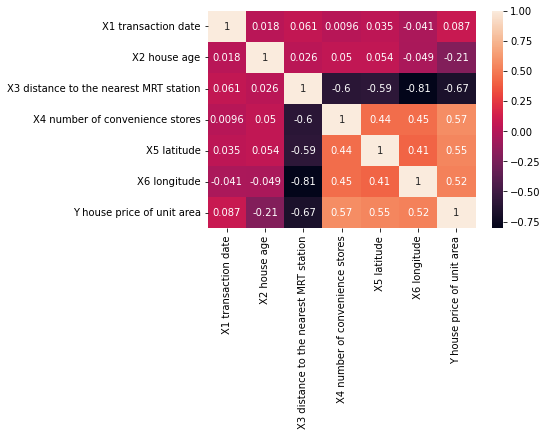

In [49]:
sns.heatmap(corelation, annot=True)

In [319]:
X = housing_df.iloc[:, 1:6]
X.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [53]:
y = housing_df.iloc[:, -1]
y[:5]

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [309]:
X_train, X_test, y_train, y_test =  train_test_split(
                                      X, y, test_size=0.15, random_state=108)

<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Model Building:</p>

In [310]:
reg_model = DecisionTreeRegressor(max_depth = 6)

In [311]:
reg_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

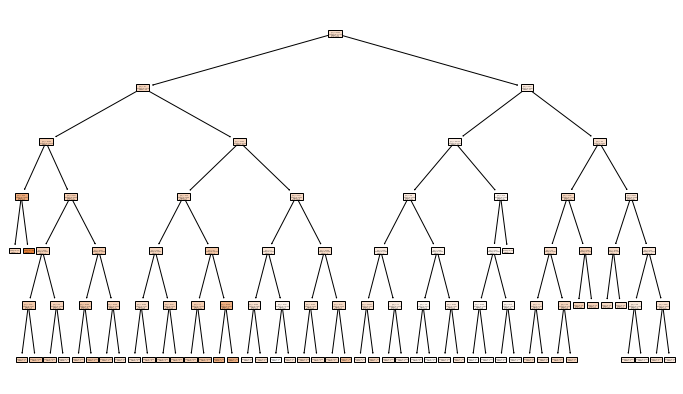

In [312]:
plt.figure(figsize = (12, 7))
plot_tree(reg_model,
          filled=True)
plt.show()

<p style="color:#3C4048; 
          font-weight: bold; 
          font-size: 18px; 
          font-family: Gill Sans, sans-serif;">
          Performace Measure:</p>

In [313]:
y_predicted = reg_model.predict(X_test)

In [314]:
r2_score(y_test, y_predicted)

0.8965171835646345

In [320]:
reg_model.predict([[13.3, 561.98450, 5, 24.98746, 121.54391]])

C:\Users\kench\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([39.69714286])

In [325]:
reg_model.score(X_test, y_test)

0.8965171835646345

In [326]:
reg_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### experimenting with parameters

In [304]:
my_dict = {}
for i in range(1, 200):
    X_train, X_test, y_train, y_test =  train_test_split(
                                      X, y, test_size=0.15, random_state=i)
    reg_model = DecisionTreeRegressor(max_depth = 6)
    reg_model.fit(X_train, y_train)
    y_predicted = reg_model.predict(X_test)
    my_dict[i] = r2_score(y_test, y_predicted)

In [305]:
max_key=0
temp = 0
for key, value in my_dict.items():
    if value > temp:
        temp = value
        max_key=key

In [306]:
max_key, temp

(108, 0.8965171835646344)